In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



Classification Report:
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         2
      medium       0.80      0.93      0.86       154
        high       0.65      0.37      0.47        54

    accuracy                           0.78       210
   macro avg       0.48      0.43      0.44       210
weighted avg       0.75      0.78      0.75       210



c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

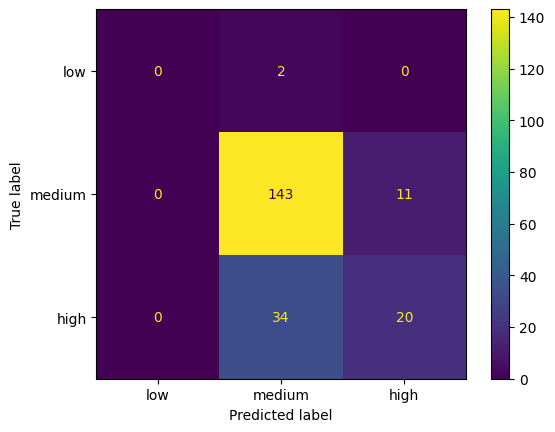

In [38]:
df = pd.read_csv("instance_dataset.csv")

def mood_to_label(mood):
    if mood <= 4:
        return "low"
    elif mood <= 7:
        return "medium"
    else:
        return "high"

df["mood_label"] = df["mood"].apply(mood_to_label)

y = df["mood_label"] 
X = df.drop(columns=["id", "date_period", "period", "mood", "mood_label"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
label_order = ["low", "medium", "high"]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=label_order))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=label_order)

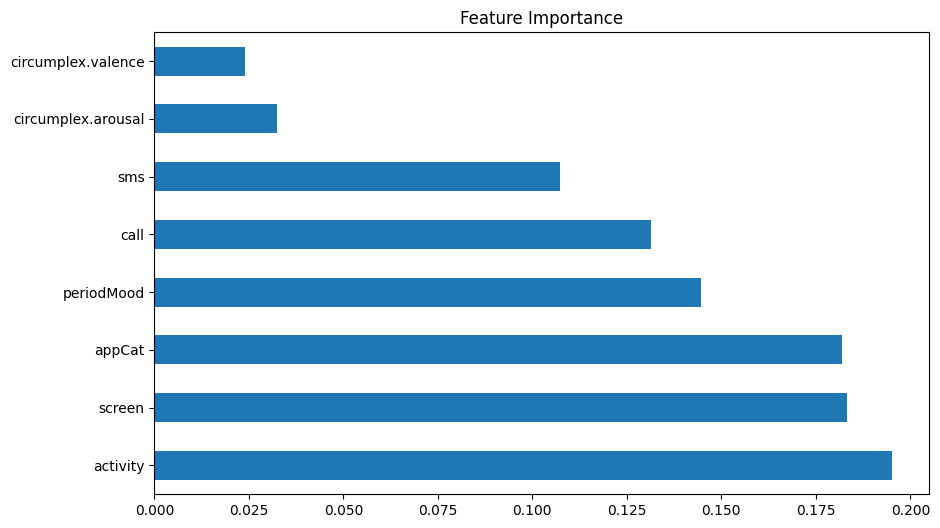

In [39]:
importances = rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

feat_imp.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


In [40]:
df = pd.read_csv("instance_dataset.csv")

X = df.drop(columns=["id", "date_period", "period", "mood"])
y = df["mood"]             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 0.5587907029478458
MSE: 0.600401317962423
R² Score: 0.0831821979867432


In [41]:
baseline = [y_train.mean()] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline)
print(f"Baseline MSE: {baseline_mse:.3f}")

Baseline MSE: 0.661
